# 多項式回歸 Polynomial Regression

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 為了確認這位求職者沒有唬爛(他表示年資6~7年，薪水16萬)，只好從他前東家提供的年資(職位)與薪水的關係表中評估

In [6]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values #職位不重要，用年資即可表示(等值)
y = dataset.iloc[:, 2].values

In [4]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


### 因為以下三點考量，不用將資料分為訓練與測試集
1. 資料不多的情況下，切分享得較無效益
2. 既有的數據都很重要，需要納入考慮(擬合)
3. 可以把全部既有資料視為訓練資料，想預測的資料視為測試資料

In [ ]:
# Splitting the dataset into the Training set and Test set
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

In [8]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y) #簡單線性回歸是用來比較用

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 用PolynomialFeatures這個函式(類/物件?)來產生不同次數(次方)的自變量

In [9]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) #嘗試degree = 2,3,4,5,...
X_poly = poly_reg.fit_transform(X) #可產生包含不同次數的自變量矩陣，[x**0,x**1,x**2,...,x**degree]

![x_poly](x_poly.png)

### 再來就可以把它當作簡單線性回歸，只是多了幾個自變量

In [12]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 看簡單線性回歸的表現

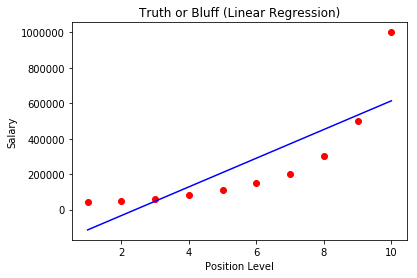

In [16]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### 再看看多項式回歸的表現

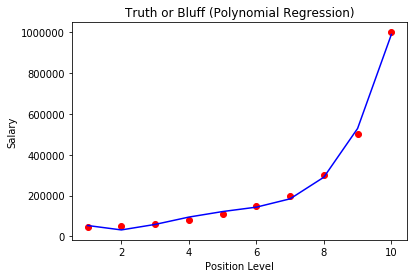

In [15]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue') #也可以寫成x_poly，只是這樣寫比較不會忘
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## 結論：
* 這位求職者沒在唬爛
* 資料不是線性分布的，可能適合用多項式回歸
* 次數越高，擬合出來的模型在訓練資料上會有越好的表現，但是在測試資料或真實資料上可能就難說了(Overfitting)